In [2]:
import numpy as np 
# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

######
# Calculations based on the parameters
eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######

# Generate L values
#L_values = np.linspace(0, 100, 1000)
Fs=0 
Ms=1000
L0=0
L_max=K*(1-(1/eta0))

#Ln = np.array(np.arange(-250, L_max, 0.1))  # Discretization of L values
#Males = np.array([(-(eta0 / K) * L**2 + (eta0+delta*vF/(uF*(uF+vF))-(uF+delta)/uF) * L )/((m*vL/uM) * ((uF+delta)/uF-(((uF+delta)*gamma*vF)/(uF*(uF+gamma)*(uF+vF))))) for L in Ln])  # Values of MS along the parabola
#Females_prime=np.array([(-(eta0 / K) * m * (1 - m) * vL**2 * (L**2) * 3 + m * (1 - m) * vL**2 * (eta0 - 1) * L*2 - (Ms * uM * (1 - m) * vL + Fs * uF * m * vL) )/(uM*Ms*uF) for L in Ln])

term1=-(eta0 / K) 
term2= (eta0+delta*vF/(uF*(uF+vF))-(uF+delta)/uF)
term3= - (uM*Ms/(m*vL)) * ((uF+delta)/uF-(((uF+delta)*gamma*vF)/(uF*(uF+gamma)*(uF+vF))))
#term4=-Ms * Fs * uM * uF 
roots = np.roots([term1, term2, term3])
print(roots)

l = []
solution = []
threshold = 1e-5
if Ms==0:
    l=roots
else:
    l.append(0)
    l.append(roots[0])
    l.append(roots[1])

for i in l:
    if i ==0:
        solution.append([0,0,0,0,0])
    else:

        M=m*vL*i/uM
        F=(uL+vL)*i/(b*(1-i/K))
        S=(Ms*(uF+delta))/(M*(uF+delta)) * F
        V=(uF+delta)/(vF)*((M+Ms)/M) * F
        solution.append([i, M, V, F, S])
print(solution)

[986.67204769   2.89265228]
[[0, 0, 0, 0, 0], [986.6720476921959, 3607.519674374591, 300.68263257266307, 1394.1281233770999, 386.45059465096045], [2.8926522835983794, 10.576259911906575, 0.881519148924976, 0.054632063988573266, 5.165537197801787]]


In [8]:
import os

output_fold = os.getcwd() + r'\output'

515
515
515


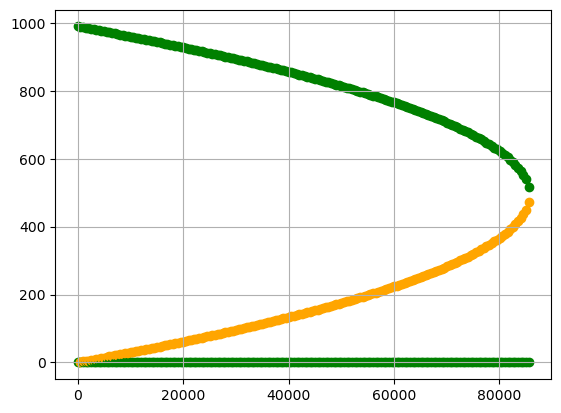

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
import sympy as sm
import numpy.linalg as linalg

# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

# Calculations based on the parameters
eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants

# Generate Ms values
Ms_values = np.linspace(0, 500000, 1000)
Ms_value = []
l_values = []
stable_points = []
unstable_points = []
solution=[]
colors=[]
# Calculate the roots for each Ms value
for Ms in Ms_values:
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * Ms / (m * vL)) * (
            (uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    roots = np.roots([term1, term2, term3])
    real_roots = [root for root in roots if np.isreal(root)]

    if len(real_roots) == 0:
        break  # Exit the loop if there are no real roots
    if Ms == 0:
        l = np.zeros(2)
        if real_roots[0]<real_roots[1]:
            l[0] = real_roots[0]
            l[1] = real_roots[1]
        
        else:
            l = real_roots
        Ms_value.append(Ms)
        Ms_value.append(Ms)
        colors.append('green')
        colors.append('green')
        l=np.array(l)
        l_values.append(l)
    else:
        l = np.zeros(3)
        if real_roots[0]<real_roots[1]:
            l[1] = real_roots[0]
            l[2] = real_roots[1]
        else:
            l[1] = real_roots[1]
            l[2] = real_roots[0]
        Ms_value.append(Ms)
        Ms_value.append(Ms)
        Ms_value.append(Ms)
        colors.append('green')
        colors.append('orange')
        colors.append('green')
        l=np.array(l)
        l_values.append(l)

        for i in l:
            if i == 0:
                solution.append([0, 0, 0, 0, 0])
                
            else:
                M = m * vL * i / uM
                F = (uL + vL) * i / (b * (1 - i / K))
                S = (Ms * (uF + delta)) / (M * (uF + delta)) * F
                V = (uF + delta) / (vF) * ((M + Ms) / M) * F
                solution.append([i, M, V, F, S])
        #print(solution)
l_values=np.concatenate(l_values)
# Associate roots with equilibrium points and determine stability
L, M, V, F, S = symbols('L M V F S')
# Define the equations
M_term = (M / (M + Ms)) if Ms != 0 else 1.0
Ms_term = (Ms / (M + Ms)) if Ms != 0 else 0.0

L_dot = b * (1 - (L / K)) * F - (vL + uL) * L
M_dot = m * vL * L - uM * M
V_dot = (1 - m) * vL * L + delta * F + gamma * S - (uF + vF) * V
F_dot = vF * M / (M + Ms) * V - (uF + delta) * F
S_dot = vF * Ms / (M + Ms) * V - (uF + gamma) * S

eqMat = sm.Matrix([L_dot, M_dot, V_dot, F_dot, S_dot])
Mat = sm.Matrix([L, M, V, F, S])
jacMat = eqMat.jacobian(Mat)

#for eq in solution:
    # Substitute equilibrium values into the Jacobian matrix and obtain eigenvalues
    #eqmat = np.array(jacMat.subs([(L, eq[0]), (M, eq[1]), (V, eq[2]), (F, eq[3]), (S, eq[4])])).astype(np.float64)
    #eigenValues, eigenVectors = linalg.eig(eqmat)

    #print('-------------------------------------------')
    #print("The real parts of the eigenvalues for the fixed point (%s, %s, %s, %s, %s) are:" % (eq[0], eq[1], eq[2], eq[3], eq[4]), eigenValues.real)

    # Check the sign of the real parts
    #if all([d < 0 for d in eigenValues.real]):
        #print("This fixed point is a sink, and the equilibrium is stable.")
    #else:
        #print("This fixed point is a source, and the equilibrium is unstable.")
for i in range(len(colors)):
    plt.scatter(Ms_value[i], l_values[i], color=colors[i])
plt.grid()
print(len(colors))
print(len(Ms_value))
print(len(l_values))


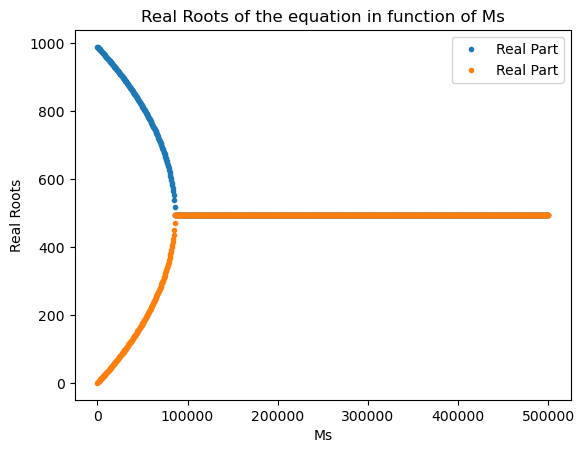

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

# Calculations based on the parameters
eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants

# Generate Ms values
Ms_values = np.linspace(0, 500000, 1000)

# Calculate the roots for each Ms value
real_roots = []
for Ms in Ms_values:
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * Ms / (m * vL)) * ((uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    roots = np.roots([term1, term2, term3])
    real_roots.append(np.real(roots))

# Plot the real roots
plt.figure()
plt.plot(Ms_values, real_roots, '.', label='Real Part')
plt.xlabel('Ms')
plt.ylabel('Real Roots')
plt.title('Real Roots of the equation in function of Ms')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (500,) and (300,)

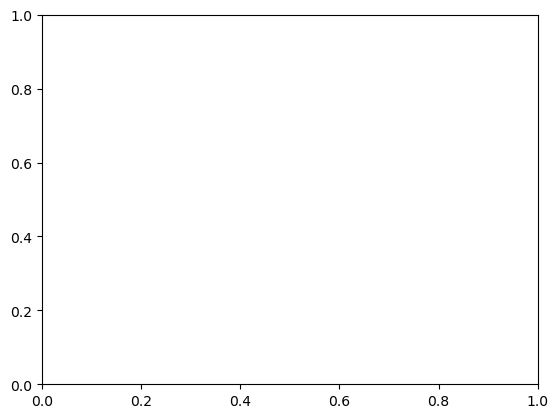

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
import sympy as sm
import numpy.linalg as linalg
from sympy import re, Abs

threshold = 1e-6

# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

# Calculations based on the parameters
eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants

# Generate Ms values
Ms_values = np.linspace(1000, 50000, 100)
Ms_value = []
l_values = []
stable_points = []
unstable_points = []
solution=[]
colors = []
# Calculate the roots for each Ms value
for Ms in Ms_values:
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * Ms / (m * vL)) * (
            (uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    roots = np.roots([term1, term2, term3])
    real_roots = [root for root in roots if np.isreal(root)]

    if len(real_roots) == 0:
        break  # Exit the loop if there are no real roots
    else:
        if Ms == 0:
            l = np.zeros(2)
            if real_roots[0]<real_roots[1]:
                l[0] = real_roots[0]
                colors.append('green')
                l[1] = real_roots[1]
                colors.append('green')
            else:
                l = real_roots
            Ms_value.append(Ms)
            Ms_value.append(Ms)
        else:
            l = np.zeros(3)
            l[0] = 0
            colors.append('green')
            colors.append('orange')
            colors.append('green')
            if real_roots[0]<real_roots[1]:
                l[1] = real_roots[0]
                l[2] = real_roots[1]
            else:
                l[1] = real_roots[1]
                l[2] = real_roots[0]
            Ms_value.append(Ms)
            Ms_value.append(Ms)
            Ms_value.append(Ms)
        for i in l:
            if i == 0:
                solution.append([0, 0, 0, 0, 0])
                
            else:
                M = m * vL * i / uM
                F = (uL + vL) * i / (b * (1 - i / K))
                S = (Ms * (uF + delta)) / (M * (uF + delta)) * F
                V = (uF + delta) / (vF) * ((M + Ms) / M) * F
                solution.append([i, M, V, F, S])
                Ms_value.append(Ms)
        #print(solution)

# Associate roots with equilibrium points and determine stability
L, M, V, F, S = symbols('L M V F S')
# Define the equations
M_term = (M / (M + Ms)) if Ms != 0 else 1.0
Ms_term = (Ms / (M + Ms)) if Ms != 0 else 0.0

L_dot = b * (1 - (L / K)) * F - (vL + uL) * L
M_dot = m * vL * L - uM * M
V_dot = (1 - m) * vL * L + delta * F + gamma * S - (uF + vF) * V
F_dot = vF * M / (M + Ms) * V - (uF + delta) * F
S_dot = vF * Ms / (M + Ms) * V - (uF + gamma) * S

# Define the symbolic expressions for the Jacobian matrix
jacMat = sm.Matrix([[-(uL+vL)-b*F/K, 0, 0, 0, b*(1-L/K)],
                    [vL*m, -uM, 0, 0, 0],
                    [vL*(1-m), 0, -(uF+vF), gamma, delta],
                    [0, -vF*(Ms/(M+Ms)**2)*V, vF*(Ms/(M+Ms)), -(uF+gamma), 0],
                    [0, vF*(Ms/(M+Ms)**2)*V, vF*(M/(M+Ms)), 0, -(uF+delta)]])




ValueError: x and y must have same first dimension, but have shapes (100,) and (85,)

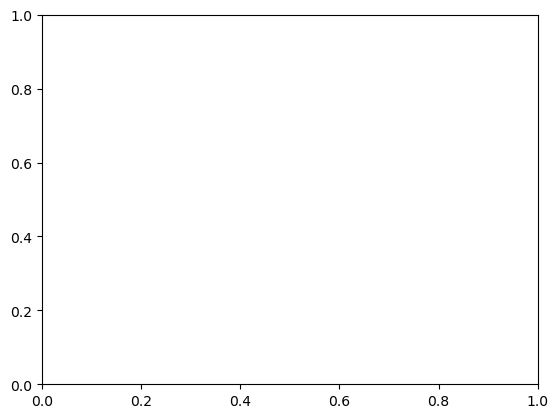

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing code...

# Calculate the roots for each Ms value


# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

# Calculations based on the parameters
eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants

# Generate Ms values
Ms_values = np.linspace(1, 100000, 100)
Ms_value = []
l_values = []
stable_points = []
unstable_points = []
solution=[]
colors = []
# Calculate the roots for each Ms value
for Ms in Ms_values:
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * Ms / (m * vL)) * (
            (uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    roots = np.roots([term1, term2, term3])
    real_roots = [root for root in roots if np.isreal(root)]

    if len(real_roots) == 0:
        break  # Exit the loop if there are no real roots
    else:
        if Ms == 0:
            l = np.zeros(2)
            if real_roots[0]<real_roots[1]:
                l[0] = real_roots[0]
                colors.append('green')
                l[1] = real_roots[1]
                colors.append('green')
            else:
                l = real_roots
            Ms_value.append(Ms)
            Ms_value.append(Ms)
        else:
            l = np.zeros(3)
            l[0] = 0
            colors.append('green')
            colors.append('orange')
            colors.append('green')
            if real_roots[0]<real_roots[1]:
                l[1] = real_roots[0]
                l[2] = real_roots[1]
            else:
                l[1] = real_roots[1]
                l[2] = real_roots[0]
            Ms_value.append(Ms)
            Ms_value.append(Ms)
            Ms_value.append(Ms)
        for i in l:
            if i == 0:
                solution.append([0, 0, 0, 0, 0])
                
            else:
                M = m * vL * i / uM
                F = (uL + vL) * i / (b * (1 - i / K))
                S = (Ms * (uF + delta)) / (M * (uF + delta)) * F
                V = (uF + delta) / (vF) * ((M + Ms) / M) * F
                solution.append([i, M, V, F, S])
                Ms_value.append(Ms)
    # Append the values of l to the l_values list
        l_values.append(l)

# Convert the l_values list to a NumPy array for plotting
l_values = np.array(l_values)

# Plot l as a function of Ms
plt.plot(Ms_values, l_values[:, 0], color='green', label='Root 1')
plt.plot(Ms_values, l_values[:, 1], color='orange', label='Root 2')
plt.plot(Ms_values, l_values[:, 2], color='green', label='Root 3')

# Add labels and title
plt.xlabel('Ms')
plt.ylabel('l')
plt.title('Roots of l as a function of Ms')

# Add a legend
plt.legend()

# Display the plot
plt.show()

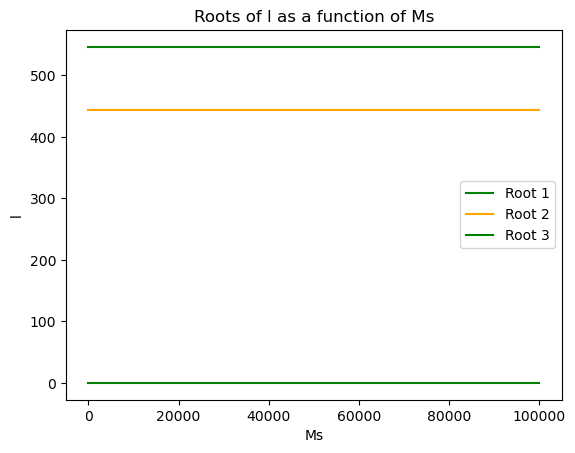

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing code...

# Calculate the roots for each Ms value
root1_values = []
root2_values = []
root3_values = []

# Calculate the roots for each Ms value
for Ms in Ms_values:
    # Your existing code...

    if len(l) > 0:
        root1_values.append(l[0])
        if len(l) > 1:
            root2_values.append(l[1])
            if len(l) > 2:
                root3_values.append(l[2])

# Convert the lists to NumPy arrays
root1_values = np.array(root1_values)
root2_values = np.array(root2_values)
root3_values = np.array(root3_values)

# Plot l as a function of Ms
plt.plot(Ms_values[:len(root1_values)], root1_values, color='green', label='Root 1')
plt.plot(Ms_values[:len(root2_values)], root2_values, color='orange', label='Root 2')
plt.plot(Ms_values[:len(root3_values)], root3_values, color='green', label='Root 3')

# Add labels and title
plt.xlabel('Ms')
plt.ylabel('l')
plt.title('Roots of l as a function of Ms')

# Add a legend
plt.legend()

# Display the plot
plt.show()
